In [32]:
import pandas as pd

# Load the data from the CSV file
file_path = './education/grades.csv'
gpa_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its columns to understand its structure
gpa_data.head(), gpa_data.columns

(   uid  gpa_all   gpa_13s  cs_65
 0  u01    2.863  1.777778    3.0
 1  u02    3.505  4.000000    4.0
 2  u04    3.029  3.500000    4.0
 3  u05    3.679  3.777778    4.0
 4  u07    3.474  4.000000    4.0,
 Index(['uid', 'gpa_all', 'gpa_13s', 'cs_65'], dtype='object'))

In [33]:
descriptive_stats = gpa_data.describe()
descriptive_stats

,gpa_all,gpa_13s,cs_65
count,30.000000,30.000000,30.000000
mean,3.421533,3.330556,3.622222
std,0.397754,0.798284,0.796224
min,2.400000,1.000000,0.000000
25%,3.257000,3.333333,3.666667
50%,3.490500,3.527778,4.000000
75%,3.698500,3.861111,4.000000
max,3.947000,4.000000,4.000000


In [34]:
pss_pre_path = './data/PSS/PSS_Pre.csv'
pss_post_path = './data/PSS/PSS_Post.csv'

pss_pre_df = pd.read_csv(pss_pre_path)
pss_post_df = pd.read_csv(pss_post_path)

# Display the first few rows of each DataFrame to review their structure and contents
pss_pre_df.head(), pss_post_df.head()

(   uid type  \
 0  u00  Pre   
 1  u01  Pre   
 2  u02  Pre   
 3  u03  Pre   
 4  u04  Pre   
 
    1. In the last month, how often have you been upset because of something that happened unexpectedly?  \
 0                                                  2                                                      
 1                                                  2                                                      
 2                                                  3                                                      
 3                                                  2                                                      
 4                                                  1                                                      
 
    2. In the last month, how often have you felt that you were unable to control the important things in your life?  \
 0                                                  2                                                                  
 1          

In [35]:
# Merge the pre and post PSS scores on 'uid'
pss_combined_df = pd.merge(pss_pre_df[['uid', 'total_score']], pss_post_df[['uid', 'total_score']], on='uid', suffixes=('_pre', '_post'))

# Calculate the change in PSS scores
pss_combined_df['pss_change'] = pss_combined_df['total_score_post'] - pss_combined_df['total_score_pre']

# Merge the combined PSS data with the GPA data
full_data_df = pd.merge(gpa_data, pss_combined_df, on='uid', how='inner')

# Display the merged data to ensure correctness
full_data_df.head(), full_data_df.columns

(   uid  gpa_all   gpa_13s  cs_65  total_score_pre  total_score_post  \
 0  u01    2.863  1.777778    3.0             21.0              22.0   
 1  u02    3.505  4.000000    4.0             19.0              27.0   
 2  u04    3.029  3.500000    4.0             19.0              21.0   
 3  u05    3.679  3.777778    4.0             21.0              17.0   
 4  u07    3.474  4.000000    4.0             24.0              24.0   
 
    pss_change  
 0         1.0  
 1         8.0  
 2         2.0  
 3        -4.0  
 4         0.0  ,
 Index(['uid', 'gpa_all', 'gpa_13s', 'cs_65', 'total_score_pre',
        'total_score_post', 'pss_change'],
       dtype='object'))

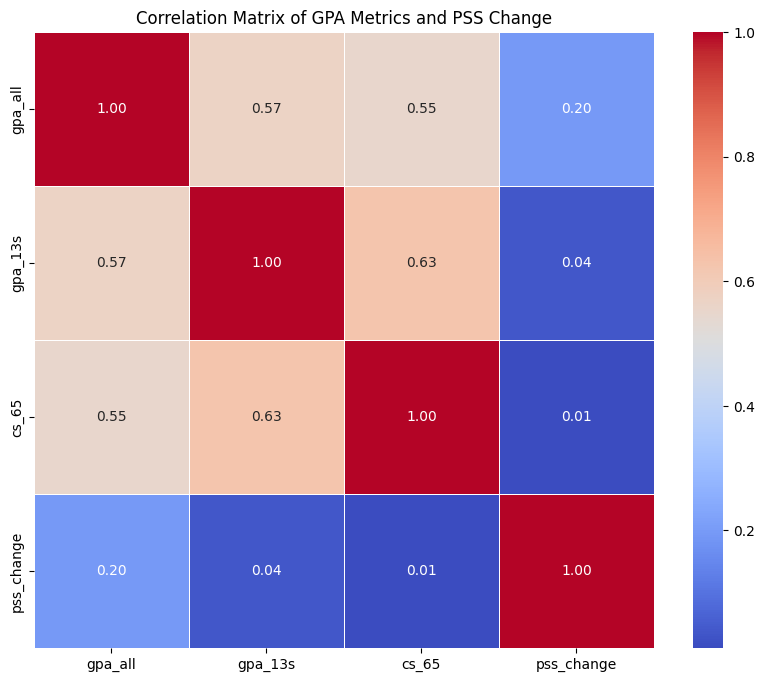

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for GPA and PSS change
correlation_matrix = full_data_df[['gpa_all', 'gpa_13s', 'cs_65', 'pss_change']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
heatmap.set_title('Correlation Matrix of GPA Metrics and PSS Change')
plt.show()

## Pearson's Correlation Coefficient

In [42]:
from scipy.stats import pearsonr

# Initialize a dictionary to store correlation results
pearson_results = {}

# List of GPA columns
gpa_columns = ['gpa_all', 'gpa_13s', 'cs_65']

# Calculate Pearson's correlation and p-values for each GPA metric with PSS change
for column in gpa_columns:
    correlation, p_value = pearsonr(full_data_df['pss_change'], full_data_df[column])
    pearson_results[column] = {'Correlation': correlation, 'P-value': p_value}

pearson_results


{'gpa_all': {'Correlation': 0.19635339894731849,
  'P-value': 0.35779431434821574},
 'gpa_13s': {'Correlation': 0.03565203187911177,
  'P-value': 0.8686395651277957},
 'cs_65': {'Correlation': 0.010926535334617765, 'P-value': 0.9595863947665932}}

## Regression Analysis

In [39]:
import statsmodels.api as sm

# Prepare the independent variables by adding a constant term (intercept)
X = sm.add_constant(full_data_df['pss_change'])

# Initialize a dictionary to store regression results
regression_results = {}

# Perform regression analysis for each GPA metric
for column in gpa_columns:
    Y = full_data_df[column]
    model = sm.OLS(Y, X).fit()
    regression_results[column] = model.summary()

# Display regression results for 'gpa_all' as an example
regression_results['gpa_all']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cs_65   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                  0.002627
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.960
Time:                        05:51:18   Log-Likelihood:                -29.298
No. Observations:                  24   AIC:                             62.60
Df Residuals:                      22   BIC:                             64.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6091      0.179     20.149      0.000       3.238       3.981
pss_change     0.0022      0.042      0.051      0.960      -0.086       0.090
==============================================================================
Omnibus:                       47.148   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.350
Skew:                          -3.521   Prob(JB):                     3.47e-46
Kurtosis:                      15.640   Cond. No.                         4.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
regression_results['gpa_13s']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gpa_13s   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                   0.02800
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.869
Time:                        05:51:18   Log-Likelihood:                -29.853
No. Observations:                  24   AIC:                             63.71
Df Residuals:                      22   BIC:                             66.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3394      0.183     18.217      0.000       2.959       3.720
pss_change     0.0072      0.043      0.167      0.869      -0.083       0.097
==============================================================================
Omnibus:                       17.589   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.594
Skew:                          -1.839   Prob(JB):                     9.17e-05
Kurtosis:                       5.251   Cond. No.                         4.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
regression_results['cs_65']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cs_65   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                  0.002627
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.960
Time:                        05:51:18   Log-Likelihood:                -29.298
No. Observations:                  24   AIC:                             62.60
Df Residuals:                      22   BIC:                             64.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6091      0.179     20.149      0.000       3.238       3.981
pss_change     0.0022      0.042      0.051      0.960      -0.086       0.090
==============================================================================
Omnibus:                       47.148   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.350
Skew:                          -3.521   Prob(JB):                     3.47e-46
Kurtosis:                      15.640   Cond. No.                         4.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall Interpretation:

The results from all three regression analyses indicate very weak to no significant relationships between changes in PSS scores and the various GPA metrics. This suggests that other factors not considered in this analysis might play a more significant role in influencing GPA outcomes.